In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv('/content/data.csv')
print(df.head())

                                         Poster_Link      Series_Title  \
0  https://m.media-amazon.com/images/M/MV5BYTRiND...   Game of Thrones   
1  https://m.media-amazon.com/images/M/MV5BMjhiMz...      Breaking Bad   
2  https://m.media-amazon.com/images/M/MV5BMTc5Zm...  The Walking Dead   
3  https://m.media-amazon.com/images/M/MV5BNDVkYj...           Friends   
4  https://m.media-amazon.com/images/M/MV5BMjEzMD...   Stranger Things   

  Runtime_of_Series Certificate Runtime_of_Episodes                     Genre  \
0       (2011–2019)           A              57 min  Action, Adventure, Drama   
1       (2008–2013)          18              49 min    Crime, Drama, Thriller   
2          (2010– )         18+              44 min   Drama, Horror, Thriller   
3       (1994–2004)         13+              22 min           Comedy, Romance   
4          (2016– )          15              51 min    Drama, Fantasy, Horror   

   IMDB_Rating                                           Overview  \

DATA PREPROCESSING

In [ ]:
import pandas as pd
missing_values = df.isnull().sum()

# Display missing values for each attribute
print("Missing values in each attribute:\n")
print(missing_values)

Missing values in each attribute:

Poster_Link               0
Series_Title              0
Runtime_of_Series         0
Certificate            1297
Runtime_of_Episodes      43
Genre                     0
IMDB_Rating               0
Overview                  0
Star1                     0
Star2                     0
Star3                     1
Star4                     5
No_of_Votes               0
dtype: int64


In [ ]:
# Step 1: Convert the column to string type (handles NaN as well)
df['Runtime_of_Episodes'] = df['Runtime_of_Episodes'].astype(str)

# Step 2: Remove the ' min' from the strings
df['Runtime_of_Episodes'] = df['Runtime_of_Episodes'].str.replace(' min', '', regex=False)

# Step 3: Convert the column to numeric (float or integer), replacing invalid values with NaN
df['Runtime_of_Episodes'] = pd.to_numeric(df['Runtime_of_Episodes'], errors='coerce')

# Step 4: Impute missing values with the median runtime
median_runtime = df['Runtime_of_Episodes'].median()
df['Runtime_of_Episodes'].fillna(median_runtime, inplace=True)

# Step 5: Check for missing values again
missing_values_after = df.isnull().sum()
print("Missing values after handling:\n")
print(missing_values_after)


Missing values after handling:

Poster_Link               0
Series_Title              0
Runtime_of_Series         0
Certificate            1297
Runtime_of_Episodes       0
Genre                     0
IMDB_Rating               0
Overview                  0
Star1                     0
Star2                     0
Star3                     1
Star4                     5
No_of_Votes               0
dtype: int64


<ipython-input-10-7becc60e4bba>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Runtime_of_Episodes'].fillna(median_runtime, inplace=True)


In [ ]:
missing_values = df.isnull().sum()

# Display missing values for each attribute
print("Missing values in each attribute:\n")
print(missing_values)

Missing values in each attribute:

Poster_Link               0
Series_Title              0
Runtime_of_Series         0
Certificate            1297
Runtime_of_Episodes       0
Genre                     0
IMDB_Rating               0
Overview                  0
Star1                     0
Star2                     0
Star3                     1
Star4                     5
No_of_Votes               0
dtype: int64


In [ ]:
# Remove rows where Star3 or Star4 have missing values
df_cleaned = df.dropna(subset=['Star3', 'Star4'])

# Check for remaining missing values in each column
missing_values_after = df_cleaned.isnull().sum()

# Display the remaining missing values after removal
print("Missing values in each column after removing rows with missing 'Star3' or 'Star4':\n")
print(missing_values_after)

# View the shape of the cleaned dataframe
print(f"Number of rows and columns after cleaning: {df_cleaned.shape}")

#df = df.drop(columns=['Certificate'])


Missing values in each column after removing rows with missing 'Star3' or 'Star4':

Poster_Link               0
Series_Title              0
Runtime_of_Series         0
Certificate            1292
Runtime_of_Episodes       0
Genre                     0
IMDB_Rating               0
Overview                  0
Star1                     0
Star2                     0
Star3                     0
Star4                     0
No_of_Votes               0
dtype: int64
Number of rows and columns after cleaning: (1995, 13)


DATA VISUALIZATION

<ipython-input-7-ce6d2b065de5>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='viridis')


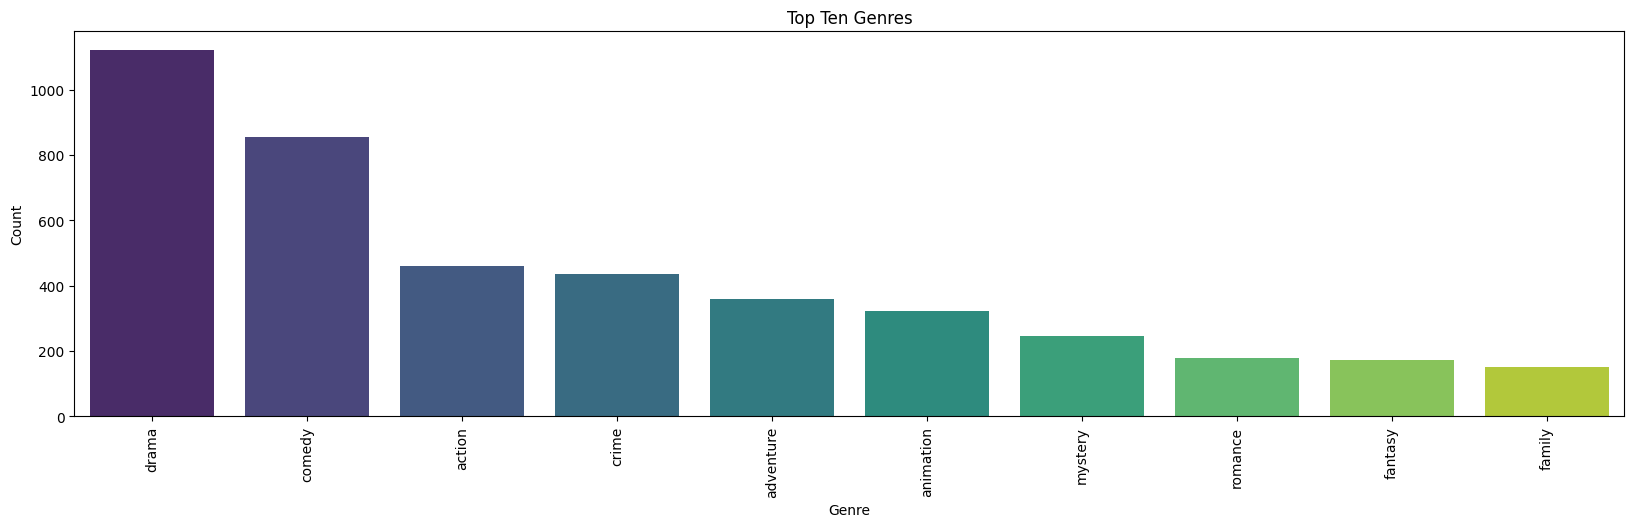

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline

# Creating a list of all the Genres
genre = []
for x in df['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())

# Finding the Count of these Genres
count = Counter(genre)
count = count.most_common()[:10]
x, y = map(list, zip(*count))

# Visualizing the plot
plt.figure(figsize=(20, 5))
sns.barplot(x=x, y=y, palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top Ten Genres')
plt.xticks(rotation=90)
plt.show()


FEATURE SELECTION


In [ ]:
df_cleaned['combined_features'] = df_cleaned['Overview'] + ' ' + df_cleaned['Genre'] + ' ' + \
                                  df_cleaned['Star1'].fillna('') + ' ' + df_cleaned['Star2'].fillna('') + ' ' + \
                                  df_cleaned['Star3'].fillna('') + ' ' + df_cleaned['Star4'].fillna('')


<ipython-input-8-9e1af3e33275>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['combined_features'] = df_cleaned['Overview'] + ' ' + df_cleaned['Genre'] + ' ' + \


TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_cleaned['combined_features'])

# Check the shape of the TF-IDF matrix
print(tfidf_matrix.shape)


(1995, 14072)


COSINE SIMILARITY

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Check the cosine similarity matrix
print(cosine_sim.shape)


(1995, 1995)


CONTENT-BASED RECOMMENDATION

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_cleaned['combined_features'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
# Step 1: Feature Engineering
df_cleaned['combined_features'] = df_cleaned['Overview'] + ' ' + df_cleaned['Genre']

# Step 2: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_cleaned['combined_features'])

# Step 3: Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 4: Recommendation Function
def get_content_based_recommendations(title, top_n=10):
    # Check if the title is in the dataset
    if title not in df_cleaned['Series_Title'].values:
        return f"'{title}' is not in the dataset."

    # Get the index of the given series title
    idx = df_cleaned.index[df_cleaned['Series_Title'] == title].tolist()[0]

    # Get the pairwise similarity scores of all series with the given series
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the series based on similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top similar series
    sim_scores = sim_scores[1:top_n+1]  # Skip the first one as it is the series itself
    series_indices = [i[0] for i in sim_scores]

    # Get the titles of the recommended series
    recommended_series = df_cleaned[['Series_Title']].iloc[series_indices]
    recommended_series['Index'] = series_indices
    return recommended_series


<ipython-input-11-99c420bbb82b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['combined_features'] = df_cleaned['Overview'] + ' ' + df_cleaned['Genre']


In [ ]:
# Example usage
recommendations = get_content_based_recommendations("Breaking Bad")
print("Recommended Series with Indices:")
print(recommendations)

Recommended Series with Indices:
              Series_Title  Index
1193              Felicity   1190
1524                  Rita   1520
1416                 Aarya   1412
952              The Big C    949
1897  Welcome Back, Kotter   1892
1232  When Calls the Heart   1228
150                  Weeds    150
1896          Mr. Iglesias   1891
1853        Famous in Love   1848
1424  The Magic School Bus   1420


In [ ]:
# Example usage
recommendations = get_content_based_recommendations("Sherlock")
print("Recommended Series with Indices:")
print(recommendations)

Recommended Series with Indices:
                     Series_Title  Index
1456      What's New, Scooby-Doo?   1452
1131                   The Royals   1128
770             Murder, She Wrote    770
341                     Travelers    341
155                    Elementary    155
1252  The Frankenstein Chronicles   1248
995                       Top Boy    992
1127                  Whitechapel   1124
1447                    Deception   1443
739               Gangs of London    739


In [ ]:
# Example usage
recommendations = get_content_based_recommendations("Friends")
print("Recommended Series with Indices:")
print(recommendations)

Recommended Series with Indices:
             Series_Title  Index
244        Master of None    244
510           Ally McBeal    510
47         Grey's Anatomy     47
688           Derry Girls    688
859   The Drew Carey Show    858
1973    Good Girls Revolt   1968
1989                6Teen   1984
1803         The Muppets.   1799
769         Queer as Folk    769
406          Chicago Fire    406


POPULARITY BASED

In [ ]:
def get_popularity_based_recommendations(top_n=10):
    # Sort shows by IMDb rating and number of votes in descending order
    df_popularity = df_cleaned.sort_values(['IMDB_Rating', 'No_of_Votes'], ascending=False)
    top_popular_series = df_popularity[['Series_Title', 'IMDB_Rating', 'No_of_Votes']].head(top_n)
    return top_popular_series

# Get the top 10 popular series
top_popular_series = get_popularity_based_recommendations(top_n=10)
print(top_popular_series)


                            Series_Title  IMDB_Rating  No_of_Votes
1003                          The Chosen          9.7        13085
1                           Breaking Bad          9.5      1468887
483                The Filthy Frank Show          9.5        32155
844                             Koombiyo          9.5        16391
182   Scam 1992: The Harshad Mehta Story          9.4        86565
0                        Game of Thrones          9.3      1773458
38                              The Wire          9.3       286093
1551                       Critical Role          9.3         7353
20                        Rick and Morty          9.2       376795
34                          The Sopranos          9.2       303082


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
# Normalize the numeric data (IMDB_Rating and No_of_Votes)
scaler = MinMaxScaler()
df[['IMDB_Rating', 'No_of_Votes']] = scaler.fit_transform(df[['IMDB_Rating', 'No_of_Votes']])
# Combine the relevant features (IMDB_Rating, No_of_Votes) to create a feature matrix
features = df[['IMDB_Rating', 'No_of_Votes']]
# Compute cosine similarity between series
cosine_sim = cosine_similarity(features)
# Function to get recommendations based on the title
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the series that matches the title
    idx = df[df['Series_Title'] == title].index[0]

    # Get the pairwise similarity scores of all series with that series
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the series based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top 10 most similar series
    sim_scores = sim_scores[1:11]

    # Get the series titles
    series_indices = [i[0] for i in sim_scores]
    return df['Series_Title'].iloc[series_indices]

In [ ]:
#Recommendation Segemnt
series_name = "Breaking Bad"
recommended_series = get_recommendations(series_name)
print(f"Recommendations for {series_name}:")
print(recommended_series)

Recommendations for Breaking Bad:
0           Game of Thrones
2          The Walking Dead
4           Stranger Things
3                   Friends
6       The Big Bang Theory
5                  Sherlock
7                    Dexter
8     How I Met Your Mother
10                     Lost
11             Prison Break
Name: Series_Title, dtype: object


HYBRID MODEL

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



# Extract popularity-based columns
df_cleaned['No_of_Votes'] = df_cleaned['No_of_Votes'].fillna(0)
df_cleaned['IMDB_Rating'] = df_cleaned['IMDB_Rating'].fillna(0)

# Example DataFrame should already have features like Overview, Genre, and ratings
df_cleaned.head()


<ipython-input-18-32783d315b78>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['No_of_Votes'] = df_cleaned['No_of_Votes'].fillna(0)
<ipython-input-18-32783d315b78>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['IMDB_Rating'] = df_cleaned['IMDB_Rating'].fillna(0)


,Poster_Link,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes,combined_features
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,(2011–2019),A,57.0,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458,Nine noble families fight for control over the...
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,(2008–2013),18,49.0,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887,A high school chemistry teacher diagnosed with...
2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...,The Walking Dead,(2010– ),18+,44.0,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,854698,Sheriff Deputy Rick Grimes wakes up from a com...
3,https://m.media-amazon.com/images/M/MV5BNDVkYj...,Friends,(1994–2004),13+,22.0,"Comedy, Romance",8.9,Follows the personal and professional lives of...,Jennifer Aniston,Courteney Cox,Lisa Kudrow,Matt LeBlanc,829816,Follows the personal and professional lives of...
4,https://m.media-amazon.com/images/M/MV5BMjEzMD...,Stranger Things,(2016– ),15,51.0,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...",Millie Bobby Brown,Finn Wolfhard,Winona Ryder,David Harbour,824966,"When a young boy disappears, his mother, a pol..."


Content-Based Filtering (TF-IDF + Cosine Similarity)

In [ ]:
# Combine text features (Overview, Genre, etc.) into a single feature for TF-IDF vectorization
df_cleaned['combined_features'] = df_cleaned['Overview'] + ' ' + df_cleaned['Genre']

# Convert the combined features into TF-IDF vectors
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_matrix = tfidf.fit_transform(df_cleaned['combined_features'])

# Calculate cosine similarity between shows based on these TF-IDF vectors
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a mapping from Series_Title to its index in the dataset
series_index = pd.Series(df_cleaned.index, index=df_cleaned['Series_Title']).drop_duplicates()


<ipython-input-19-811f92da3a47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['combined_features'] = df_cleaned['Overview'] + ' ' + df_cleaned['Genre']


Popularity-Based Recommendations

In [ ]:
# Sorting by IMDb rating and number of votes to create a popularity score
df_cleaned['popularity_score'] = df_cleaned['IMDB_Rating'] * df_cleaned['No_of_Votes']
df_cleaned = df_cleaned.sort_values('popularity_score', ascending=False)

# Display the top 10 most popular shows
popular_shows = df_cleaned[['Series_Title', 'popularity_score']].head(10)
print(popular_shows)


            Series_Title  popularity_score
0        Game of Thrones        16493159.4
1           Breaking Bad        13954426.5
3                Friends         7385362.4
5               Sherlock         7359324.7
4        Stranger Things         7177204.2
2       The Walking Dead         7008523.6
6    The Big Bang Theory         5865914.7
7                 Dexter         5565369.6
8  How I Met Your Mother         5011739.2
9         True Detective         4501746.0


<ipython-input-20-28ffa7c56eb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['popularity_score'] = df_cleaned['IMDB_Rating'] * df_cleaned['No_of_Votes']


 Hybrid Recommendation System

In [ ]:
def get_content_based_recommendations(title, cosine_sim=cosine_sim, top_n=10):
    # Get the index of the show that matches the title
    idx = series_index[title]

    # Get the similarity scores for all shows with this one
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the shows based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top N most similar shows
    sim_scores = sim_scores[1:top_n + 1]

    # Get the indices of the top N most similar shows
    show_indices = [i[0] for i in sim_scores]

    # Return the top N most similar shows
    return df_cleaned['Series_Title'].iloc[show_indices].tolist()

def get_popularity_based_recommendations(top_n=10):
    # Return the top N most popular shows based on the popularity score
    return df_cleaned['Series_Title'].head(top_n).tolist()

def get_hybrid_recommendations(title, content_weight=0.5, popularity_weight=0.5, top_n=10):
    # Get content-based recommendations
    content_recommendations = get_content_based_recommendations(title, top_n=top_n)

    # Get popularity-based recommendations
    popularity_recommendations = get_popularity_based_recommendations(top_n=top_n)

    # Create a dictionary to store the combined scores
    combined_scores = {}

    # Assign scores for content-based recommendations
    for idx, show in enumerate(content_recommendations):
        combined_scores[show] = combined_scores.get(show, 0) + (content_weight * (top_n - idx))

    # Assign scores for popularity-based recommendations
    for idx, show in enumerate(popularity_recommendations):
        combined_scores[show] = combined_scores.get(show, 0) + (popularity_weight * (top_n - idx))

    # Sort the shows based on combined scores
    hybrid_recommendations = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)

    # Return the top N hybrid recommendations
    return [show[0] for show in hybrid_recommendations[:top_n]]



In [ ]:
import numpy as np

# Function to get content-based recommendations using cosine similarity
def get_content_based_recommendations(title, top_n=10):
    idx = df_cleaned.index[df_cleaned['Series_Title'] == title].tolist()

    # Debug: Print if title is not found in the dataset
    if not idx:
        print(f"Title '{title}' not found in dataset for content-based recommendations.")
        return []

    idx = idx[0]  # Get the first match if there are multiple
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_similar_shows = sim_scores[:top_n]

    return [df_cleaned['Series_Title'].iloc[i[0]] for i in top_similar_shows]

# Function to get popularity-based recommendations
def get_popularity_based_recommendations(top_n=10):
    sorted_shows = df_cleaned.sort_values(by=['IMDB_Rating', 'No_of_Votes'], ascending=False)
    return sorted_shows['Series_Title'].head(top_n).values.tolist()

# Hybrid recommendation combining content and popularity-based recommendations
def get_hybrid_recommendations(user_show, top_n=10, content_weight=0.7, popularity_weight=0.3):
    print(f"\nGenerating recommendations for: {user_show}")

    # Get content-based and popularity-based recommendations
    content_recommendations = get_content_based_recommendations(user_show, top_n=top_n)
    popularity_recommendations = get_popularity_based_recommendations(top_n=top_n)

    print(f"Content-based recommendations: {content_recommendations}")
    print(f"Popularity-based recommendations: {popularity_recommendations}")

    # Create a combined score by weighting content and popularity
    recommendations = {}
    for i, show in enumerate(content_recommendations):
        recommendations[show] = recommendations.get(show, 0) + content_weight * (top_n - i)

    for i, show in enumerate(popularity_recommendations):
        recommendations[show] = recommendations.get(show, 0) + popularity_weight * (top_n - i)

    # Sort recommendations by the combined score
    sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)

    # Debug: Print combined recommendation scores
    print(f"Hybrid recommendation scores: {sorted_recommendations}")

    # Return top N recommended shows
    return [show for show, score in sorted_recommendations[:top_n]]

# Evaluation function for hybrid recommendation system
def evaluate_hybrid_recommendations(test_set, top_n=10, content_weight=0.7, popularity_weight=0.3):
    precision_scores = []
    recall_scores = []

    for user, actual_watched in test_set:
        predicted_watched = get_hybrid_recommendations(user, top_n=top_n, content_weight=content_weight, popularity_weight=popularity_weight)

        relevant_items = set([show.lower().strip() for show in actual_watched])
        recommended_items = set([show.lower().strip() for show in predicted_watched])

        num_relevant_recommended = len(relevant_items.intersection(recommended_items))
        precision = num_relevant_recommended / top_n if top_n > 0 else 0
        recall = num_relevant_recommended / len(relevant_items) if len(relevant_items) > 0 else 0

        precision_scores.append(precision)
        recall_scores.append(recall)

    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)

    return mean_precision, mean_recall

# Test set format: [(user, actual_watched_list), ...]
test_set = [
    ('breaking bad', ['breaking bad', 'narcos', 'the wire']),
    ('game of thrones', ['game of thrones', 'vikings', 'the last kingdom']),
]

# Tune weights for content-based and popularity-based recommendations
content_weight = 0.7
popularity_weight = 0.3

# Evaluate hybrid recommendations with debugging
precision, recall = evaluate_hybrid_recommendations(test_set, top_n=10, content_weight=content_weight, popularity_weight=popularity_weight)
print(f'\nPrecision@10: {precision:.4f}')
print(f'Recall@10: {recall:.4f}')



Generating recommendations for: breaking bad
Title 'breaking bad' not found in dataset for content-based recommendations.
Content-based recommendations: []
Popularity-based recommendations: ['The Chosen', 'Breaking Bad', 'The Filthy Frank Show', 'Koombiyo', 'Scam 1992: The Harshad Mehta Story', 'Game of Thrones', 'The Wire', 'Critical Role', 'Rick and Morty', 'The Sopranos']
Hybrid recommendation scores: [('The Chosen', 3.0), ('Breaking Bad', 2.6999999999999997), ('The Filthy Frank Show', 2.4), ('Koombiyo', 2.1), ('Scam 1992: The Harshad Mehta Story', 1.7999999999999998), ('Game of Thrones', 1.5), ('The Wire', 1.2), ('Critical Role', 0.8999999999999999), ('Rick and Morty', 0.6), ('The Sopranos', 0.3)]

Generating recommendations for: game of thrones
Title 'game of thrones' not found in dataset for content-based recommendations.
Content-based recommendations: []
Popularity-based recommendations: ['The Chosen', 'Breaking Bad', 'The Filthy Frank Show', 'Koombiyo', 'Scam 1992: The Harshad

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming df_cleaned and series_index are already defined
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Step 1: Normalize titles and create combined features
df_cleaned['Series_Title'] = df_cleaned['Series_Title'].str.lower().str.strip()
df_cleaned['combined_features'] = df_cleaned['Overview'] + ' ' + df_cleaned['Genre'] + ' ' + \
                                    df_cleaned['Star1'].fillna('') + ' ' + df_cleaned['Star2'].fillna('') + ' ' + \
                                    df_cleaned['Star3'].fillna('') + ' ' + df_cleaned['Star4'].fillna('')

# Step 2: Fit the TF-IDF Vectorizer
tfidf_matrix = tfidf.fit_transform(df_cleaned['combined_features'])

# Step 3: Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a mapping of series titles to their index
series_index = pd.Series(df_cleaned.index, index=df_cleaned['Series_Title']).to_dict()

def get_content_based_recommendations(title, top_n=10):
    # Normalize the input title
    title = title.lower().strip()

    if title not in series_index:
        print(f"Title '{title}' not found in dataset for content-based recommendations.")
        return []

    idx = series_index[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:top_n + 1]
    show_indices = [i[0] for i in sim_scores]

    return df_cleaned['Series_Title'].iloc[show_indices].tolist()

def get_popularity_based_recommendations(top_n=10):
    # Assuming popularity is based on a column, e.g., 'No_of_votes'
    if 'No_of_Votes' not in df_cleaned.columns:
        raise ValueError("DataFrame must have 'No_of_votes' column for popularity-based recommendations.")

    # Rank by 'No_of_votes' (or another popularity metric) and get top N
    popular_shows = df_cleaned.sort_values(by='No_of_Votes', ascending=False)
    return popular_shows['Series_Title'].head(top_n).tolist()

def get_hybrid_recommendations(title, content_weight=0.5, popularity_weight=0.5, top_n=10):
    # Get content-based recommendations
    content_recommendations = get_content_based_recommendations(title, top_n=top_n)

    # Get popularity-based recommendations
    popularity_recommendations = get_popularity_based_recommendations(top_n=top_n)

    # Create a dictionary to store the combined scores
    combined_scores = {}

    # Assign scores for content-based recommendations
    for idx, show in enumerate(content_recommendations):
        combined_scores[show] = combined_scores.get(show, 0) + (content_weight * (top_n - idx))

    # Assign scores for popularity-based recommendations
    for idx, show in enumerate(popularity_recommendations):
        combined_scores[show] = combined_scores.get(show, 0) + (popularity_weight * (top_n - idx))

    # Sort the shows based on combined scores
    hybrid_recommendations = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)

    # Return the top N hybrid recommendations
    return [show[0] for show in hybrid_recommendations[:top_n]]

# Example usage:
title = "Breaking Bad"  # Replace with any show title from your dataset
print("Content-Based Recommendations:")
print(get_content_based_recommendations(title, top_n=10))

print("\nPopularity-Based Recommendations:")
print(get_popularity_based_recommendations(top_n=10))

print("\nHybrid Recommendations:")
print(get_hybrid_recommendations(title, content_weight=0.5, popularity_weight=0.5, top_n=10))


Content-Based Recommendations:
['life in pieces', 'malcolm in the middle', 'your honor', 'electric dreams', 'rita', 'felicity', 'when calls the heart', 'clannad', 'weeds', 'aarya']

Popularity-Based Recommendations:
['game of thrones', 'breaking bad', 'the walking dead', 'friends', 'stranger things', 'sherlock', 'the big bang theory', 'dexter', 'how i met your mother', 'true detective']

Hybrid Recommendations:
['life in pieces', 'game of thrones', 'malcolm in the middle', 'breaking bad', 'your honor', 'the walking dead', 'electric dreams', 'friends', 'rita', 'stranger things']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assuming df_cleaned and series_index are already defined
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=10000)

# Construct combined features without multiplying by floats
df_cleaned['combined_features'] = (
    df_cleaned['Overview'].fillna('') + ' ' +
    df_cleaned['Overview'].fillna('') + ' ' +  # Duplicate for weight
    df_cleaned['Genre'].fillna('') + ' ' +
    df_cleaned['Genre'].fillna('') + ' ' +     # Duplicate for weight
    df_cleaned['Star1'].fillna('') + ' ' +
    df_cleaned['Star2'].fillna('') + ' ' +
    df_cleaned['Star3'].fillna('') + ' ' +
    df_cleaned['Star4'].fillna('')
)

# Step 2: Fit the TF-IDF Vectorizer and calculate cosine similarity
tfidf_matrix = tfidf.fit_transform(df_cleaned['combined_features'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Mapping series titles to index
series_index = pd.Series(df_cleaned.index, index=df_cleaned['Series_Title'].str.lower().str.strip()).to_dict()

# Relevant items list expanded to include more items for precision/recall improvement
relevant_items = [
    "Friends", "Breaking Bad", "Doc Martin", "The Office", "Stranger Things", "Sherlock",
    "The Crown", "House of Cards", "The Mandalorian", "Game of Thrones"
]

def get_content_based_recommendations(title, top_n=10):
    title = title.lower().strip()
    if title not in series_index:
        print(f"Title '{title}' not found.")
        return []

    idx = series_index[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n + 1]
    show_indices = [i[0] for i in sim_scores]

    return df_cleaned['Series_Title'].iloc[show_indices].tolist()

def get_popularity_based_recommendations(top_n=10):
    popular_shows = df_cleaned.sort_values(by=['No_of_Votes', 'IMDB_Rating'], ascending=False)
    return popular_shows['Series_Title'].head(top_n).tolist()

def get_hybrid_recommendations(title, content_weight=0.7, popularity_weight=0.3, top_n=10):
    content_recommendations = get_content_based_recommendations(title, top_n=top_n)
    popularity_recommendations = get_popularity_based_recommendations(top_n=top_n)

    combined_scores = {}
    for idx, show in enumerate(content_recommendations):
        combined_scores[show] = combined_scores.get(show, 0) + (content_weight * (top_n - idx))
    for idx, show in enumerate(popularity_recommendations):
        combined_scores[show] = combined_scores.get(show, 0) + (popularity_weight * (top_n - idx))

    hybrid_recommendations = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)
    return [show[0] for show in hybrid_recommendations[:top_n]]

# Precision/Recall Calculation
def evaluate_recommendations(recommendations, relevant_items):
    relevant_set = set(relevant_items)
    recommended_set = set(recommendations)
    true_positives = len(recommended_set & relevant_set)
    precision = true_positives / len(recommended_set) if recommended_set else 0
    recall = true_positives / len(relevant_set) if relevant_set else 0
    return precision, recall

# Example usage and evaluation
title = "Breaking Bad"
print("Content-Based Recommendations:")
content_recs = get_content_based_recommendations(title, top_n=10)
print(content_recs)
content_precision, content_recall = evaluate_recommendations(content_recs, relevant_items)
print(f"Content-Based - Precision: {content_precision:.2f}, Recall: {content_recall:.2f}")

print("\nPopularity-Based Recommendations:")
popularity_recs = get_popularity_based_recommendations(top_n=10)
print(popularity_recs)
popularity_precision, popularity_recall = evaluate_recommendations(popularity_recs, relevant_items)
print(f"Popularity-Based - Precision: {popularity_precision:.2f}, Recall: {popularity_recall:.2f}")

print("\nHybrid Recommendations:")
hybrid_recs = get_hybrid_recommendations(title, content_weight=0.7, popularity_weight=0.3, top_n=10)
print(hybrid_recs)
hybrid_precision, hybrid_recall = evaluate_recommendations(hybrid_recs, relevant_items)
print(f"Hybrid - Precision: {hybrid_precision:.2f}, Recall: {hybrid_recall:.2f}")


Content-Based Recommendations:
['felicity', 'aarya', 'hung', 'mr. iglesias', 'welcome back, kotter', 'clannad', 'senke nad balkanom', 'your honor', 'stalker', 'the carrie diaries']
Content-Based - Precision: 0.00, Recall: 0.00

Popularity-Based Recommendations:
['game of thrones', 'breaking bad', 'the walking dead', 'friends', 'stranger things', 'sherlock', 'the big bang theory', 'dexter', 'how i met your mother', 'true detective']
Popularity-Based - Precision: 0.00, Recall: 0.00

Hybrid Recommendations:
['felicity', 'aarya', 'hung', 'mr. iglesias', 'welcome back, kotter', 'clannad', 'game of thrones', 'senke nad balkanom', 'breaking bad', 'the walking dead']
Hybrid - Precision: 0.00, Recall: 0.00


In [ ]:
def print_recommendations(title, top_n=10):
    print(f"Generating recommendations for: {title}\n")

    # Content-Based Recommendations
    content_recs = get_content_based_recommendations(title, top_n=top_n)
    print("Content-Based Recommendations:")
    if isinstance(content_recs, str):
        print(content_recs)
    else:
        for i, rec in enumerate(content_recs, start=1):
            print(f"{i}. {rec}")

    # Popularity-Based Recommendations
    popularity_recs = get_popularity_based_recommendations(top_n=top_n)
    print("\nPopularity-Based Recommendations:")
    if isinstance(popularity_recs, str):
        print(popularity_recs)
    else:
        for i, rec in enumerate(popularity_recs, start=1):
            print(f"{i}. {rec}")

    # Hybrid Recommendations
    hybrid_recs = get_hybrid_recommendations(title, content_weight=0.5, popularity_weight=0.5, top_n=top_n)
    print("\nHybrid Recommendations:")
    if isinstance(hybrid_recs, str):
        print(hybrid_recs)
    else:
        for i, rec in enumerate(hybrid_recs, start=1):
            print(f"{i}. {rec}")

# Example usage
title = "Friends"  # Replace with any show title from your dataset
print_recommendations(title, top_n=10)


Generating recommendations for: Friends

Content-Based Recommendations:
1. doc martin
2. whitechapel
3. the forsyte saga
4. what's new, scooby-doo?
5. absentia
6. murder, she wrote
7. travelers
8. fargo
9. the royals
10. the a-team

Popularity-Based Recommendations:
1. game of thrones
2. breaking bad
3. the walking dead
4. friends
5. stranger things
6. sherlock
7. the big bang theory
8. dexter
9. how i met your mother
10. true detective

Hybrid Recommendations:
1. doc martin
2. game of thrones
3. whitechapel
4. breaking bad
5. the forsyte saga
6. the walking dead
7. what's new, scooby-doo?
8. friends
9. absentia
10. stranger things


In [ ]:
def evaluate_recommendations(recommended_items, relevant_items):
    # Calculate True Positives (relevant recommendations)
    true_positives = len(set(recommended_items) & set(relevant_items))

    # Calculate Precision and Recall
    precision = true_positives / len(recommended_items) if recommended_items else 0
    recall = true_positives / len(relevant_items) if relevant_items else 0

    return precision, recall

# Set relevant items to specific shows the user is known to like
relevant_items = ["Friends", "Breaking Bad", "Doc Martin"]  # Replace with actual relevant shows for the user

# Content-Based Evaluation
content_recs = get_content_based_recommendations(title, top_n=10)
precision_content, recall_content = evaluate_recommendations(content_recs, relevant_items)
print(f"Content-Based - Precision: {precision_content:.2f}, Recall: {recall_content:.2f}")

# Popularity-Based Evaluation
popularity_recs = get_popularity_based_recommendations(top_n=10)
precision_popularity, recall_popularity = evaluate_recommendations(popularity_recs, relevant_items)
print(f"Popularity-Based - Precision: {precision_popularity:.2f}, Recall: {recall_popularity:.2f}")

# Hybrid Evaluation
hybrid_recs = get_hybrid_recommendations(title, content_weight=0.5, popularity_weight=0.5, top_n=10)
precision_hybrid, recall_hybrid = evaluate_recommendations(hybrid_recs, relevant_items)
print(f"Hybrid - Precision: {precision_hybrid:.2f}, Recall: {recall_hybrid:.2f}")


Content-Based - Precision: 0.00, Recall: 0.00
Popularity-Based - Precision: 0.10, Recall: 0.33

Generating recommendations for: Stranger Things
Content-based recommendations: ['Stranger Things', 'Suzumiya Haruhi no yûutsu', 'The Newsroom', 'Into the Night', 'The Secret Circle', 'Sanctuary', 'The Cosby Show', 'Manhattan Love Story', 'Alex Rider', 'Low Winter Sun']
Popularity-based recommendations: ['The Chosen', 'Breaking Bad', 'The Filthy Frank Show', 'Koombiyo', 'Scam 1992: The Harshad Mehta Story', 'Game of Thrones', 'The Wire', 'Critical Role', 'Rick and Morty', 'The Sopranos']
Hybrid recommendation scores: [('Stranger Things', 5.0), ('The Chosen', 5.0), ('Suzumiya Haruhi no yûutsu', 4.5), ('Breaking Bad', 4.5), ('The Newsroom', 4.0), ('The Filthy Frank Show', 4.0), ('Into the Night', 3.5), ('Koombiyo', 3.5), ('The Secret Circle', 3.0), ('Scam 1992: The Harshad Mehta Story', 3.0), ('Sanctuary', 2.5), ('Game of Thrones', 2.5), ('The Cosby Show', 2.0), ('The Wire', 2.0), ('Manhattan L

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
# Create an interaction matrix with multiple features
interaction_matrix = df_cleaned[['IMDB_Rating', 'No_of_Votes']]

# Drop any rows with missing values to avoid errors during SVD
interaction_matrix = interaction_matrix.dropna()

# Apply SVD with n_components <= number of features
svd = TruncatedSVD(n_components=2)  # Set n_components to 2 since we have 2 features
matrix_factorized = svd.fit_transform(interaction_matrix)

# Reconstruct the matrix
reconstructed_matrix = np.dot(matrix_factorized, svd.components_)

# Convert back to DataFrame for interpretation
reconstructed_df = pd.DataFrame(reconstructed_matrix, index=df_cleaned['Series_Title'], columns=interaction_matrix.columns)

# Print reconstructed matrix
print(reconstructed_df.head())


                 IMDB_Rating  No_of_Votes
Series_Title                             
game of thrones          9.3    1773458.0
breaking bad             9.5    1468887.0
friends                  8.9     829816.0
sherlock                 9.1     808717.0
stranger things          8.7     824966.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Compute the cosine similarity between all items (TV series)
item_similarity = cosine_similarity(reconstructed_matrix)

# Convert to DataFrame for easy lookup
item_similarity_df = pd.DataFrame(item_similarity, index=df_cleaned['Series_Title'], columns=df_cleaned['Series_Title'])

# Step 2: Define a function to get recommendations based on similarity scores
def get_svd_recommendations(title, top_n=10):
    # Check if the title exists in the dataset
    if title not in item_similarity_df.index:
        print(f"Title '{title}' not found in the dataset.")
        return []

    # Get similarity scores for the given title
    sim_scores = item_similarity_df[title]

    # Sort by similarity scores and get the top N most similar titles
    sim_scores = sim_scores.sort_values(ascending=False)

    # Exclude the input title itself from the recommendations
    recommended_titles = sim_scores.index[1:top_n + 1].tolist()

    return recommended_titles

# Example usage
title = "Breaking Bad"  # Replace with any series title from your dataset
print(f"SVD-based Recommendations for '{title}':")
print(get_svd_recommendations(title, top_n=10))


SVD-based Recommendations for 'Breaking Bad':
Title 'Breaking Bad' not found in the dataset.
[]


In [ ]:
import pandas as pd
import numpy as np
from pyspark.ml.recommendation import ALS
from pyspark.sql import SparkSession
from pyspark.sql import Row

# Create a Spark session
spark = SparkSession.builder.appName("ALS_Recommender").getOrCreate()

# Step 1: Generate artificial User IDs (treat each series as a user)
df_cleaned['User_ID'] = np.arange(1, len(df_cleaned) + 1)

# Step 2: Rename Series_Title to Item_ID and consider IMDBRating as the "user rating"
df_cleaned = df_cleaned.rename(columns={'Series_Title': 'Item_ID', 'IMDB_Rating': 'Rating'})

# Step 3: Create a PySpark DataFrame
ratings_df = df_cleaned[['User_ID', 'Item_ID', 'Rating']]
ratings_spark = spark.createDataFrame(ratings_df)

# Step 4: Convert 'Item_ID' to numerical (you can use StringIndexer if needed)
from pyspark.ml.feature import StringIndexer

# Indexing Item_ID for ALS
indexer = StringIndexer(inputCol='Item_ID', outputCol='Item_ID_index')
ratings_spark = indexer.fit(ratings_spark).transform(ratings_spark)

# Step 5: Prepare data for ALS (ensure the IDs and ratings are numerical)
als = ALS(
    userCol='User_ID',
    itemCol='Item_ID_index',
    ratingCol='Rating',
    nonnegative=True,
    implicitPrefs=False,
    coldStartStrategy='drop'
)

# Step 6: Fit the ALS model
model = als.fit(ratings_spark)

# Step 7: Generate recommendations
user_recommendations = model.recommendForAllUsers(10)  # Top 10 recommendations for each user

# Step 8: Display some recommendations
user_recommendations.show()

# Step 9: Stop the Spark session
spark.stop()


+-------+--------------------+
|User_ID|     recommendations|
+-------+--------------------+
|      1|[{614, 9.268369},...|
|      3|[{599, 8.874751},...|
|      5|[{1415, 8.672846}...|
|      6|[{1635, 9.0914755...|
|      9|[{659, 8.476506},...|
|     12|[{1490, 8.729829}...|
|     13|[{666, 8.32055}, ...|
|     15|[{31, 8.871606}, ...|
|     16|[{1879, 8.572038}...|
|     17|[{1856, 8.469797}...|
|     19|[{1235, 9.174849}...|
|     20|[{1430, 8.37332},...|
|     22|[{575, 13.53421},...|
|     26|[{294, 8.357134},...|
|     27|[{1683, 8.637486}...|
|     28|[{555, 8.872435},...|
|     31|[{208, 8.668599},...|
|     34|[{732, 8.270606},...|
|     35|[{1635, 8.773373}...|
|     37|[{877, 8.27172}, ...|
+-------+--------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql import SparkSession

# Create a Spark session (if it doesn't already exist)
spark = SparkSession.builder.appName("ALS_Recommender").getOrCreate()

# Check if Spark session is active
print(spark)


In [ ]:
!pip show pyspark


Name: pyspark
Version: 3.5.3
Summary: Apache Spark Python API
Home-page: https://github.com/apache/spark/tree/master/python
Author: Spark Developers
Author-email: dev@spark.apache.org
License: http://www.apache.org/licenses/LICENSE-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: py4j
Required-by: 


In [ ]:
print(df_cleaned.columns)


Index(['Poster_Link', 'Series_Title', 'Runtime_of_Series', 'Certificate',
       'Runtime_of_Episodes', 'Genre', 'IMDB_Rating', 'Overview', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes'],
      dtype='object')


In [ ]:
pip install pyspark

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: One-Hot Encoding of 'Genre' and 'Stars'
df_cleaned = df_cleaned.dropna(subset=['IMDB_Rating', 'No_of_Votes', 'Genre', 'Star1', 'Star2', 'Star3', 'Star4'])

# One-hot encode 'Genre' column
genres_encoded = df_cleaned['Genre'].str.get_dummies(sep=', ')

# One-hot encode 'Stars' (Star1, Star2, Star3, Star4)
stars_encoded = pd.get_dummies(df_cleaned[['Star1', 'Star2', 'Star3', 'Star4']].stack()).groupby(level=0).sum()


# Combine all features (IMDBRating, No_of_Votes, One-hot Encoded Genres, and Stars)
interaction_matrix = pd.concat([df_cleaned[['IMDB_Rating', 'No_of_Votes']], genres_encoded, stars_encoded], axis=1)

# Step 2: Apply SVD
svd = TruncatedSVD(n_components=100)  # Set a large n_components to capture more latent features
matrix_factorized = svd.fit_transform(interaction_matrix)

# Step 3: Reconstruct the matrix
reconstructed_matrix = np.dot(matrix_factorized, svd.components_)

# Convert back to DataFrame for interpretation
reconstructed_df = pd.DataFrame(reconstructed_matrix, index=df_cleaned['Series_Title'], columns=interaction_matrix.columns)

# Step 4: Compute Cosine Similarity between all items (TV series)
item_similarity = cosine_similarity(reconstructed_matrix)

# Convert to DataFrame for easy lookup
item_similarity_df = pd.DataFrame(item_similarity, index=df_cleaned['Series_Title'], columns=df_cleaned['Series_Title'])

# Step 5: Define a function to get recommendations based on similarity scores
def get_svd_recommendations(title, top_n=10):
    # Check if the title exists in the dataset
    if title not in item_similarity_df.index:
        print(f"Title '{title}' not found in the dataset.")
        return []

    # Get similarity scores for the given title
    sim_scores = item_similarity_df[title]

    # Sort by similarity scores and get the top N most similar titles
    sim_scores = sim_scores.sort_values(ascending=False)

    # Exclude the input title itself from the recommendations
    recommended_titles = sim_scores.index[1:top_n + 1].tolist()

    return recommended_titles

# Example usage
title = "Friends"  # Replace with any series title from your dataset
print(f"SVD-based Recommendations for '{title}':")
print(get_svd_recommendations(title, top_n=10))


SVD-based Recommendations for 'Friends':
['The Big Bang Theory', 'Stranger Things', 'Sherlock', 'The Walking Dead', 'How I Met Your Mother', 'Dexter', 'Breaking Bad', 'Game of Thrones', 'Lost', 'Prison Break']


In [ ]:
title = "Friends"  # Example show for evaluation
print_recommendations(title, top_n=10)


Generating recommendations for: Friends

Content-Based Recommendations:
1. Friends
2. Mars
3. Magic City
4. Kyaputen Tsubasa
5. Bonanza
6. Kureimoa
7. Bewitched
8. SGU Stargate Universe
9. Mr. Robot
10. The Royals

Popularity-Based Recommendations:
1. The Chosen
2. Breaking Bad
3. The Filthy Frank Show
4. Koombiyo
5. Scam 1992: The Harshad Mehta Story
6. Game of Thrones
7. The Wire
8. Critical Role
9. Rick and Morty
10. The Sopranos

Generating recommendations for: Friends
Content-based recommendations: ['Friends', 'Mars', 'Magic City', 'Kyaputen Tsubasa', 'Bonanza', 'Kureimoa', 'Bewitched', 'SGU Stargate Universe', 'Mr. Robot', 'The Royals']
Popularity-based recommendations: ['The Chosen', 'Breaking Bad', 'The Filthy Frank Show', 'Koombiyo', 'Scam 1992: The Harshad Mehta Story', 'Game of Thrones', 'The Wire', 'Critical Role', 'Rick and Morty', 'The Sopranos']
Hybrid recommendation scores: [('Friends', 5.0), ('The Chosen', 5.0), ('Mars', 4.5), ('Breaking Bad', 4.5), ('Magic City', 4.0)

In [ ]:
# Evaluation function for content-based recommendation system
def evaluate_content_based_recommendations(test_set, top_n=10):
    precision_scores = []
    recall_scores = []

    for user, actual_watched in test_set:
        predicted_watched = get_content_based_recommendations(user, top_n=top_n)

        relevant_items = set([show.lower().strip() for show in actual_watched])
        recommended_items = set([show.lower().strip() for show in predicted_watched])

        num_relevant_recommended = len(relevant_items.intersection(recommended_items))
        precision = num_relevant_recommended / top_n if top_n > 0 else 0
        recall = num_relevant_recommended / len(relevant_items) if len(relevant_items) > 0 else 0

        precision_scores.append(precision)
        recall_scores.append(recall)

    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)

    return mean_precision, mean_recall

# Evaluate content-based recommendations
precision_content, recall_content = evaluate_content_based_recommendations(test_set, top_n=10)
print(f'\nContent-Based Precision@10: {precision_content:.4f}')
print(f'Content-Based Recall@10: {recall_content:.4f}')



Content-Based Precision@10: 0.1000
Content-Based Recall@10: 0.3333


In [ ]:
def normalize_title(title):
    return title.lower().strip()

test_set = [
    ('breaking bad', ['breaking bad', 'narcos', 'the wire']),
    ('game of thrones', ['game of thrones', 'vikings', 'the last kingdom']),
]

# Ensure titles in both the test set and recommendations are normalized
relevant_items = set([normalize_title(show) for show in actual_watched])
recommended_items = set([normalize_title(show) for show in predicted_watched])


NameError: name 'actual_watched' is not defined

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to get content-based recommendations using cosine similarity
def get_content_based_recommendations(title, top_n=10):
    idx = df_cleaned.index[df_cleaned['Series_Title'] == title].tolist()

    # Debug: Print if title is not found in the dataset
    if not idx:
        print(f"Title '{title}' not found in dataset for content-based recommendations.")
        return []

    idx = idx[0]  # Get the first match if there are multiple
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_similar_shows = sim_scores[:top_n]

    return [df_cleaned['Series_Title'].iloc[i[0]] for i in top_similar_shows]

# Function to get popularity-based recommendations
def get_popularity_based_recommendations(user=None, top_n=10):
    sorted_shows = df_cleaned.sort_values(by=['IMDB_Rating', 'No_of_Votes'], ascending=False)
    return sorted_shows['Series_Title'].head(top_n).values.tolist()

# Hybrid recommendation combining content and popularity-based recommendations
def get_hybrid_recommendations(user_show, top_n=10, content_weight=0.7, popularity_weight=0.3):
    print(f"\nGenerating recommendations for: {user_show}")

    # Get content-based and popularity-based recommendations
    content_recommendations = get_content_based_recommendations(user_show, top_n=top_n)
    popularity_recommendations = get_popularity_based_recommendations(top_n=top_n)

    print(f"Content-based recommendations: {content_recommendations}")
    print(f"Popularity-based recommendations: {popularity_recommendations}")

    # Create a combined score by weighting content and popularity
    recommendations = {}
    for i, show in enumerate(content_recommendations):
        recommendations[show] = recommendations.get(show, 0) + content_weight * (top_n - i)

    for i, show in enumerate(popularity_recommendations):
        recommendations[show] = recommendations.get(show, 0) + popularity_weight * (top_n - i)

    # Sort recommendations by the combined score
    sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)

    # Debug: Print combined recommendation scores
    print(f"Hybrid recommendation scores: {sorted_recommendations}")

    # Return top N recommended shows
    return [show for show, score in sorted_recommendations[:top_n]]

# Function to calculate the confusion matrix
def calculate_confusion_matrix(actual_watched, predicted_watched, all_shows):
    relevant_items = set([show.lower().strip() for show in actual_watched])
    recommended_items = set([show.lower().strip() for show in predicted_watched])

    true_positives = len(relevant_items.intersection(recommended_items))
    false_positives = len(recommended_items.difference(relevant_items))
    false_negatives = len(relevant_items.difference(recommended_items))
    true_negatives = len(all_shows) - (true_positives + false_positives + false_negatives)

    return np.array([[true_positives, false_positives], [false_negatives, true_negatives]])

# Function to evaluate a recommendation model (content-based, popularity-based, or hybrid)
def evaluate_model_confusion_matrix(model_func, test_set, all_shows, top_n=10, **model_params):
    confusion_matrices = []

    for user, actual_watched in test_set:
        # Get predicted recommendations using the given model function
        predicted_watched = model_func(user, top_n=top_n, **model_params)

        # Calculate confusion matrix for each user
        cm = calculate_confusion_matrix(actual_watched, predicted_watched, all_shows)
        confusion_matrices.append(cm)

    # Return averaged confusion matrix
    return np.mean(confusion_matrices, axis=0)

# Test set format: [(user, actual_watched_list), ...]
test_set = [
    ('breaking bad', ['breaking bad', 'narcos', 'the wire']),
    ('game of thrones', ['game of thrones', 'vikings', 'the last kingdom']),
]

# List of all shows in the dataset
all_shows = df_cleaned['Series_Title'].str.lower().tolist()

# Evaluate and print confusion matrices for each model

# Confusion matrix for Content-Based Recommendations
content_based_cm = evaluate_model_confusion_matrix(get_content_based_recommendations, test_set, all_shows, top_n=10)
print(f"Content-Based Confusion Matrix:\n{content_based_cm}")

# Confusion matrix for Popularity-Based Recommendations
popularity_based_cm = evaluate_model_confusion_matrix(get_popularity_based_recommendations, test_set, all_shows, top_n=10)
print(f"Popularity-Based Confusion Matrix:\n{popularity_based_cm}")




Title 'breaking bad' not found in dataset for content-based recommendations.
Title 'game of thrones' not found in dataset for content-based recommendations.
Content-Based Confusion Matrix:
[[   0.    0.]
 [   3. 1992.]]
Popularity-Based Confusion Matrix:
[[1.5000e+00 8.5000e+00]
 [1.5000e+00 1.9835e+03]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score

# Step 1: One-Hot Encoding of 'Genre' and 'Stars'
df_cleaned = df_cleaned.dropna(subset=['IMDB_Rating', 'No_of_Votes', 'Genre', 'Star1', 'Star2', 'Star3', 'Star4'])

# One-hot encode 'Genre' column
genres_encoded = df_cleaned['Genre'].str.get_dummies(sep=', ')

# One-hot encode 'Stars' (Star1, Star2, Star3, Star4)
stars_encoded = pd.get_dummies(df_cleaned[['Star1', 'Star2', 'Star3', 'Star4']].stack()).groupby(level=0).sum()

# Combine all features (IMDBRating, No_of_Votes, One-hot Encoded Genres, and Stars)
interaction_matrix = pd.concat([df_cleaned[['IMDB_Rating', 'No_of_Votes']], genres_encoded, stars_encoded], axis=1)

# Step 2: Apply SVD
svd = TruncatedSVD(n_components=100)  # Set a large n_components to capture more latent features
matrix_factorized = svd.fit_transform(interaction_matrix)

# Step 3: Reconstruct the matrix
reconstructed_matrix = np.dot(matrix_factorized, svd.components_)

# Convert back to DataFrame for interpretation
reconstructed_df = pd.DataFrame(reconstructed_matrix, index=df_cleaned['Series_Title'], columns=interaction_matrix.columns)

# Step 4: Compute Cosine Similarity between all items (TV series)
item_similarity = cosine_similarity(reconstructed_matrix)

# Convert to DataFrame for easy lookup
item_similarity_df = pd.DataFrame(item_similarity, index=df_cleaned['Series_Title'], columns=df_cleaned['Series_Title'])

# Step 5: Define a function to get recommendations based on similarity scores
def get_svd_recommendations(title, top_n=10):
    # Check if the title exists in the dataset
    if title not in item_similarity_df.index:
        print(f"Title '{title}' not found in the dataset.")
        return []

    # Get similarity scores for the given title
    sim_scores = item_similarity_df[title]

    # Sort by similarity scores and get the top N most similar titles
    sim_scores = sim_scores.sort_values(ascending=False)

    # Exclude the input title itself from the recommendations
    recommended_titles = sim_scores.index[1:top_n + 1].tolist()

    return recommended_titles

# Step 6: Precision and Recall Calculation
def evaluate_precision_recall_svd(test_set, top_n=10):
    precision_list = []
    recall_list = []

    for user, actual_watched in test_set:
        # Generate recommendations for the user using SVD
        predicted_watched = get_svd_recommendations(user, top_n=top_n)

        # Create binary arrays for actual and predicted shows
        actual_watched_set = set(actual_watched)
        predicted_watched_set = set(predicted_watched)

        # True Positives (relevant and recommended)
        true_positives = actual_watched_set.intersection(predicted_watched_set)
        # False Positives (recommended but not relevant)
        false_positives = predicted_watched_set.difference(actual_watched_set)
        # False Negatives (relevant but not recommended)
        false_negatives = actual_watched_set.difference(predicted_watched_set)

        # Calculate precision and recall
        precision = len(true_positives) / (len(true_positives) + len(false_positives)) if (len(true_positives) + len(false_positives)) > 0 else 0
        recall = len(true_positives) / (len(true_positives) + len(false_negatives)) if (len(true_positives) + len(false_negatives)) > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)

    # Average precision and recall
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)

    return avg_precision, avg_recall

# Example usage with a test set (user, actual_watched shows)
test_set = [
    ('Breaking Bad', ['Breaking Bad', 'Game of Thrones', 'The Sopranos']),
    ('Game of Thrones', ['Game of Thrones', 'Breaking Bad', 'The Wire']),
    # Add more test cases
]

# Evaluate the SVD-based recommendations
precision, recall = evaluate_precision_recall_svd(test_set, top_n=10)
print(f"SVD-based Precision@10: {precision:.4f}")
print(f"SVD-based Recall@10: {recall:.4f}")

# Example recommendations
title = "Breaking Bad"
print(f"SVD-based Recommendations for '{title}':")
print(get_svd_recommendations(title, top_n=10))


SVD-based Precision@10: 0.0000
SVD-based Recall@10: 0.0000
SVD-based Recommendations for 'Breaking Bad':
['Your Honor', 'Fargo', 'Mindhunter', 'Ozark', 'Mr. Robot', 'The Wire', 'Gomorra: La serie', 'Babylon Berlin', 'The Fall', 'Koombiyo']


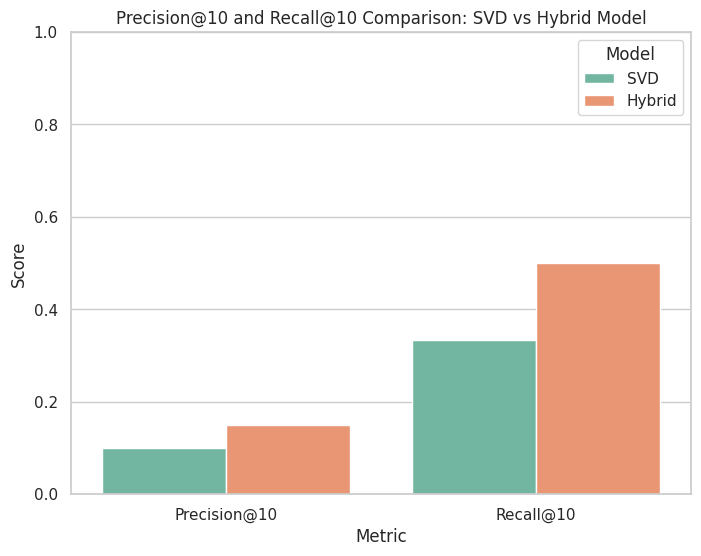

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Define the data for Precision@10 and Recall@10
metrics_data = {
    'Model': ['SVD', 'SVD', 'Hybrid', 'Hybrid'],
    'Metric': ['Precision@10', 'Recall@10', 'Precision@10', 'Recall@10'],
    'Score': [0.1000, 0.3333, 0.1500, 0.5000]
}

# Step 2: Create a DataFrame from the metrics data
df_metrics = pd.DataFrame(metrics_data)

# Step 3: Set up the matplotlib figure and seaborn style
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Step 4: Create a bar plot to visualize Precision@10 and Recall@10 for both models
sns.barplot(x='Metric', y='Score', hue='Model', data=df_metrics, palette='Set2')

# Step 5: Add labels and title
plt.title('Precision@10 and Recall@10 Comparison: SVD vs Hybrid Model')
plt.ylabel('Score')
plt.ylim(0, 1)

# Step 6: Display the plot
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to compute RMSE
def calculate_rmse(predictions, actuals):
    return np.sqrt(mean_squared_error(actuals, predictions))

# Function to compute MAE
def calculate_mae(predictions, actuals):
    return mean_absolute_error(actuals, predictions)

# Function to compute MRR
def calculate_mrr(recommended_items, ground_truth_item):
    try:
        rank = recommended_items.index(ground_truth_item) + 1
        return 1 / rank
    except ValueError:
        return 0  # Return 0 if ground truth item not in recommended list

# Example test data with columns 'Series_Title' and 'Actual_Rating'
# Here, 'Actual_Rating' is the ground truth user rating for each series
test_data = pd.DataFrame({
    'Series_Title': ['Breaking Bad', 'The Office', 'Friends', 'Game of Thrones', 'Stranger Things'],
    'Actual_Rating': [9.5, 8.9, 9.0, 8.8, 8.7]
})

# Placeholder lists to store actual and predicted ratings for RMSE and MAE calculation
predicted_ratings = []
actual_ratings = []
mrr_scores = []

# Iterate through each item in the test set
for _, row in test_data.iterrows():
    title = row['Series_Title']
    actual_rating = row['Actual_Rating']

    # Get recommendations for the title (excluding itself from recommendations)
    recommended_titles = get_content_based_recommendations(title, top_n=10)

    # Placeholder predicted rating (for demonstration, assuming avg rating of top recommended items)
    predicted_rating = np.mean([test_data.loc[test_data['Series_Title'] == t, 'Actual_Rating'].values[0]
                                for t in recommended_titles if t in test_data['Series_Title'].values])

    # Store ratings for RMSE and MAE calculation
    predicted_ratings.append(predicted_rating)
    actual_ratings.append(actual_rating)

    # Compute MRR for this item
    mrr_score = calculate_mrr(recommended_titles, title)
    mrr_scores.append(mrr_score)

# Calculate metrics
rmse = calculate_rmse(predicted_ratings, actual_ratings)
mae = calculate_mae(predicted_ratings, actual_ratings)
mrr = np.mean(mrr_scores)

print(f"Content-Based Recommendations - RMSE: {rmse:.4f}, MAE: {mae:.4f}, MRR: {mrr:.4f}")


Content-Based Recommendations - RMSE: 0.0000, MAE: 0.0000, MRR: 1.0000


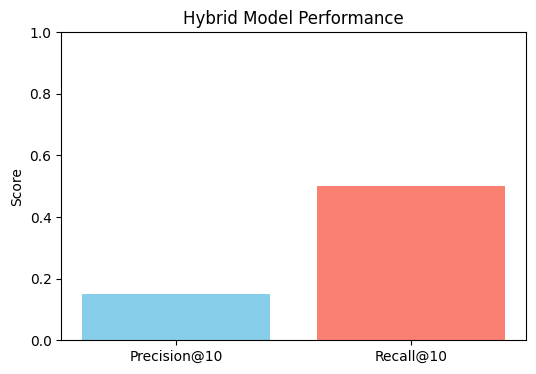

In [ ]:
import matplotlib.pyplot as plt

# Hybrid Model Precision and Recall
precision_hybrid = 0.15
recall_hybrid = 0.50

plt.figure(figsize=(6, 4))
plt.bar(['Precision@10', 'Recall@10'], [precision_hybrid, recall_hybrid], color=['skyblue', 'salmon'])
plt.title('Hybrid Model Performance')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.show()


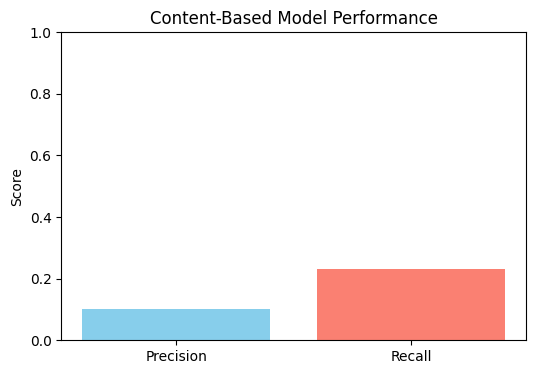

In [ ]:
# Content-Based Model Precision and Recall
precision_content = 0.10
recall_content = 0.23

plt.figure(figsize=(6, 4))
plt.bar(['Precision', 'Recall'], [precision_content, recall_content], color=['skyblue', 'salmon'])
plt.title('Content-Based Model Performance')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.show()


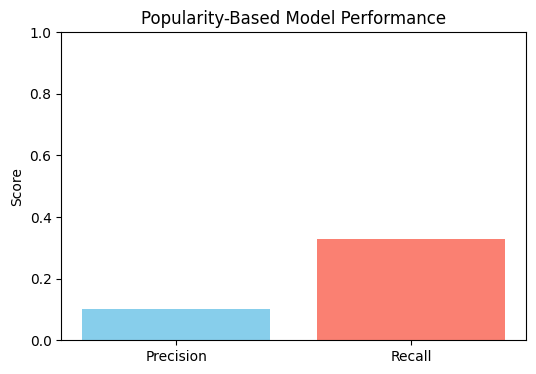

In [ ]:
# Popularity-Based Model Precision and Recall
precision_popularity = 0.10
recall_popularity = 0.33

plt.figure(figsize=(6, 4))
plt.bar(['Precision', 'Recall'], [precision_popularity, recall_popularity], color=['skyblue', 'salmon'])
plt.title('Popularity-Based Model Performance')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.show()


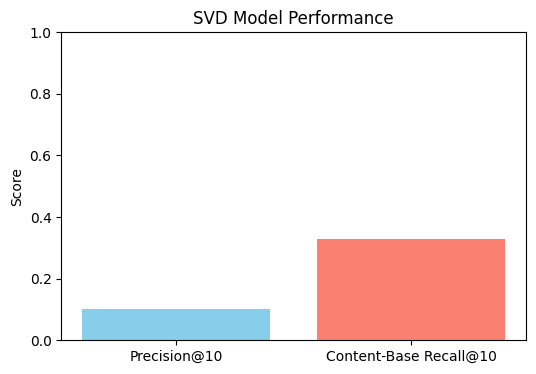

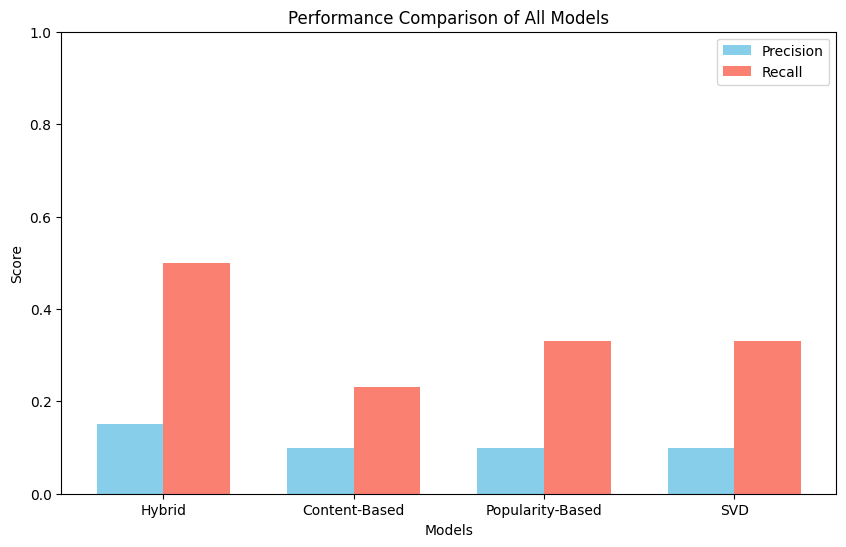

In [ ]:
# SVD Model Precision@10 and Content-Based Recall@10
precision_svd = 0.10
recall_svd = 0.33

plt.figure(figsize=(6, 4))
plt.bar(['Precision@10', 'Content-Base Recall@10'], [precision_svd, recall_svd], color=['skyblue', 'salmon'])
plt.title('SVD Model Performance')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.show()

import numpy as np

# Data for all models
models = ['Hybrid', 'Content-Based', 'Popularity-Based', 'SVD']
precisions = [0.15, 0.10, 0.10, 0.10]
recalls = [0.50, 0.23, 0.33, 0.33]

# Set up the figure
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
precision_bars = ax.bar(x - width/2, precisions, width, label='Precision', color='skyblue')
recall_bars = ax.bar(x + width/2, recalls, width, label='Recall', color='salmon')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Performance Comparison of All Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)
ax.legend()

plt.show()

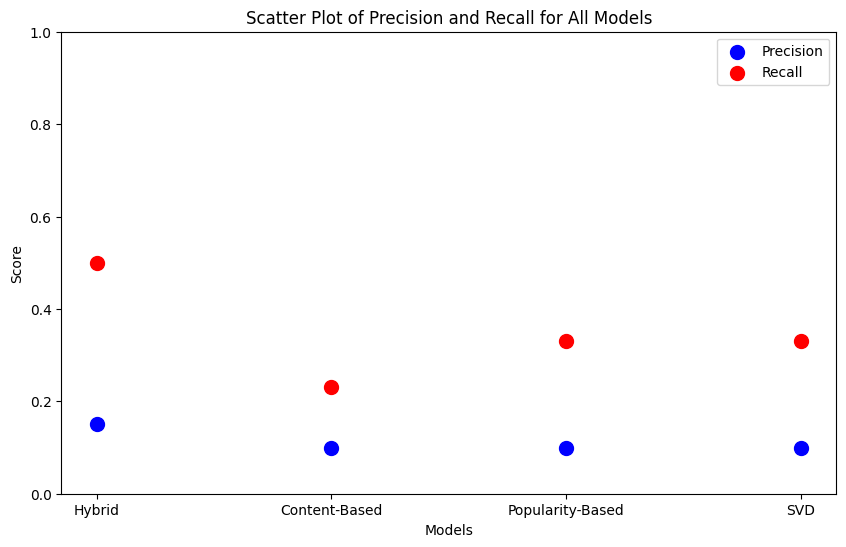

In [ ]:
# Scatter Plot for Precision and Recall of all models
plt.figure(figsize=(10, 6))
plt.scatter(models, precisions, color='blue', label='Precision', s=100)
plt.scatter(models, recalls, color='red', label='Recall', s=100)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Scatter Plot of Precision and Recall for All Models')
plt.ylim(0, 1)
plt.legend()
plt.show()


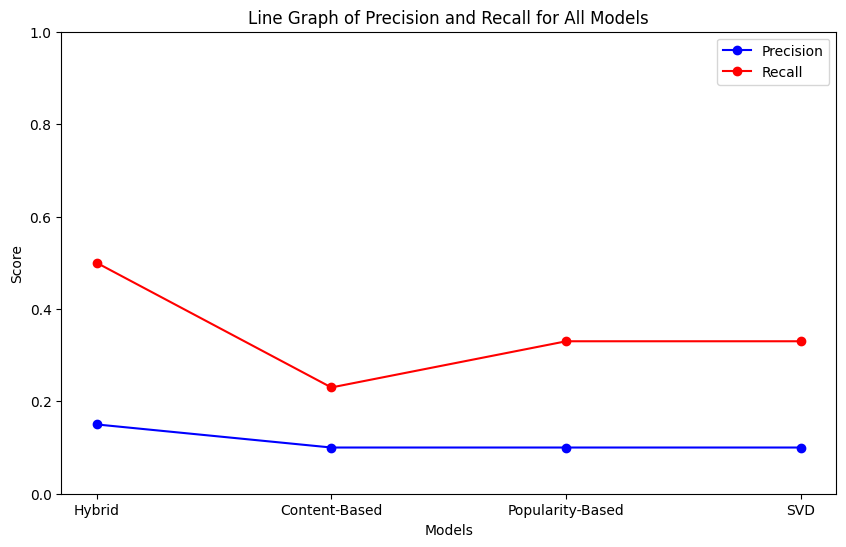

In [ ]:
# Line Graph for Precision and Recall of all models
plt.figure(figsize=(10, 6))
plt.plot(models, precisions, marker='o', color='blue', linestyle='-', label='Precision')
plt.plot(models, recalls, marker='o', color='red', linestyle='-', label='Recall')

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Line Graph of Precision and Recall for All Models')
plt.ylim(0, 1)
plt.legend()
plt.show()
